In [31]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

class data_class:

    def __init__(self):
        self.data = None
    
    def read_data(self):
        file_path = input("Please Enter File Path : ")
        if(file_path[-1] == "n"):
            self.data = pd.read_json(file_path)
        elif(file_path[-1] == "v"):
            self.data = pd.read_csv(file_path)
        elif(file_path[-1] == "x"):
            self.data = pd.read_xlsx(file_path)
        else:
            print("This File Isn't Valid")
    
    def data_summary(self,data):
        # give general info
        # give me a special column
        # handle if the chosen column is categorical
        print("1.Information about all the columns and it situations and how many rows :-\n")
        print(self.data.info())
        print("______________________________________________\n")

        #ask the user if want information about a particular column: according to the replay
        info_about_column = input("Do you want some analysis about a particular column (N) if you don't want :")
        behave = False
        if(info_about_column == "N"):
            print("Thank you for Using my system!")
        else:
            #here we check if the user entered the right column name or not
            for i in self.data.columns:
                if(i == info_about_column):
                    #the column is exit
                    behave = True
                    break
            if(behave):#This line edited according to the replay :
                if(self.data[info_about_column].dtype == "int64" or self.data[info_about_column].dtype == 'float64'):
                    print("Here we can know what is the values that's exist in this column and how many times it reapeat\n")
                    print("if it's an integer column it'll show the minimum value and the maximum and the ranges of the values from 25% 50% 75% \n")
                    #general information about the whole table columns and more
                    print(self.data[info_about_column].describe())
                    print("______________________________________________\n")
                    #the most repeated value in one of the columns
                    print("And now in this column the most repeated value is :")
                    self.data[info_about_column].mode()
                    print("______________________________________________\n")
                    #the mean for one of the columns using pandas
                    print("The mean of the target column :- \n")
                    print(self.data[info_about_column].mean())
                    print("______________________________________________\n")
                    #the mean for one of the columns using NumPy
                    print(np.mean(self.data[info_about_column]))
                    print("______________________________________________\n")
                    # to know the greatest value in the column using NumPy
                    print("The Highest value of the target column :- \n")
                    print(np.max(self.data[info_about_column]))
                    print("______________________________________________\n")
                    # to know the smallest value in the column using NumPy
                    print("The Smallest of the target column :- \n")
                    print(np.min(self.data[info_about_column]))

                    #this part added according to the replay
                    _, axs = plt.subplots(2,2)
                    axs[0,0].plot(self.data[info_about_column])
                    axs[0,0].set_title("Values "+info_about_column)
                    axs[0,1].plot(self.data[info_about_column].value_counts())
                    axs[0,1].set_title("Value Counts "+info_about_column)
                    axs[1,0].hist(self.data[info_about_column])
                    axs[1,0].set_title("Values histogram "+info_about_column)
                    axs[1,1].hist(self.data[info_about_column].value_counts())
                    axs[1,1].set_title("Value Counts histogram "+info_about_column)
                    plt.tight_layout()
                    plt.show()

                else:
                    print("______________________________________________\n")
                    #to know how much is the values and how much it repeated
                    print("That's  not a numerical data \n")
                    print("The values that's exist in this column and the repeats:- \n")
                    print(self.data[info_about_column].value_counts())
                    #added according to the replay
                    plt.plot(self.data[info_about_column].value_counts())
                    plt.show()
                    print("______________________________________________\n")
            else:
                print("sorry there's no column at this name")
                
    def clear_missing(self,data):
        # check the entered data
        print("First The Empty Rows is \n")
        empty_rows = data[data.isnull().any(axis=1)]
        ans = input("Do you wanna delete or fill the empty cells (D/F): ")
        if(ans == "D"):
            data = data.dropna()
            return data
        if(ans == "F"):
            fill = input("you wanna fill it with : ")
            data = data.fillna(fill)
            return data
        else:
            print("Invalid input")
    
    def  categorys(self,data,categ):
        data.groupby(categ).describe()
    
    def encode_categorical_data(self,data):
        return pd.get_dummies(data)
        
    def encode_column(self,data,column):
        #encoded_column = pd.get_dummies(data.data[column])
        encoded_column = pd.get_dummies(data[column])
        return encoded_column

In [32]:
data = data_class()

In [33]:
data.read_data()

Please Enter File Path :  file.csv


In [34]:
data.data
# data came successfuly

,Year,Industry_aggregation_NZSIOC,Industry_code_NZSIOC,Industry_name_NZSIOC,Units,Variable_code,Variable_name,Variable_category,Value,Industry_code_ANZSIC06
0,2021,Level 1,99999,All industries,Dollars (millions),H01,Total income,Financial performance,"757,504",ANZSIC06 divisions A-S (excluding classes K633...
1,2021,Level 1,99999,All industries,Dollars (millions),H04,"Sales, government funding, grants and subsidies",Financial performance,"674,890",ANZSIC06 divisions A-S (excluding classes K633...
2,2021,Level 1,99999,All industries,Dollars (millions),H05,"Interest, dividends and donations",Financial performance,"49,593",ANZSIC06 divisions A-S (excluding classes K633...
3,2021,Level 1,99999,All industries,Dollars (millions),H07,Non-operating income,Financial performance,"33,020",ANZSIC06 divisions A-S (excluding classes K633...
4,2021,Level 1,99999,All industries,Dollars (millions),H08,Total expenditure,Financial performance,"654,404",ANZSIC06 divisions A-S (excluding classes K633...
...,...,...,...,...,...,...,...,...,...,...
41710,2021,Level 3,ZZ11,Food product manufacturing,Percentage,H37,Quick ratio,Financial ratios,52,"ANZSIC06 groups C111, C112, C113, C114, C115, ..."
41711,2021,Level 3,ZZ11,Food product manufacturing,Percentage,H38,Margin on sales of goods for resale,Financial ratios,40,"ANZSIC06 groups C111, C112, C113, C114, C115, ..."
41712,2021,Level 3,ZZ11,Food product manufacturing,Percentage,H39,Return on equity,Financial ratios,12,"ANZSIC06 groups C111, C112, C113, C114, C115, ..."
41713,2013,Level 3,ZZ11,Food product manufacturing,Percentage,H40,Return on total assets,Financial ratios,5,"ANZSIC06 groups C111, C112, C113, C114, C115, ..."


1.Information about all the columns and it situations and how many rows :-

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41715 entries, 0 to 41714
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Year                         41715 non-null  int64 
 1   Industry_aggregation_NZSIOC  41715 non-null  object
 2   Industry_code_NZSIOC         41715 non-null  object
 3   Industry_name_NZSIOC         41715 non-null  object
 4   Units                        41715 non-null  object
 5   Variable_code                41715 non-null  object
 6   Variable_name                41715 non-null  object
 7   Variable_category            41715 non-null  object
 8   Value                        41715 non-null  object
 9   Industry_code_ANZSIC06       41715 non-null  object
dtypes: int64(1), object(9)
memory usage: 3.2+ MB
None
______________________________________________



Do you want some analysis about a particular column (N) if you don't want : Year


Here we can know what is the values that's exist in this column and how many times it reapeat

if it's an integer column it'll show the minimum value and the maximum and the ranges of the values from 25% 50% 75% 

count    41715.000000
mean      2017.004219
std          2.582016
min       2013.000000
25%       2015.000000
50%       2017.000000
75%       2019.000000
max       2021.000000
Name: Year, dtype: float64
______________________________________________

And now in this column the most repeated value is :
______________________________________________

The mean of the target column :- 

2017.0042191058371
______________________________________________

2017.0042191058371
______________________________________________

The Highest value of the target column :- 

2021
______________________________________________

The Smallest of the target column :- 

2013


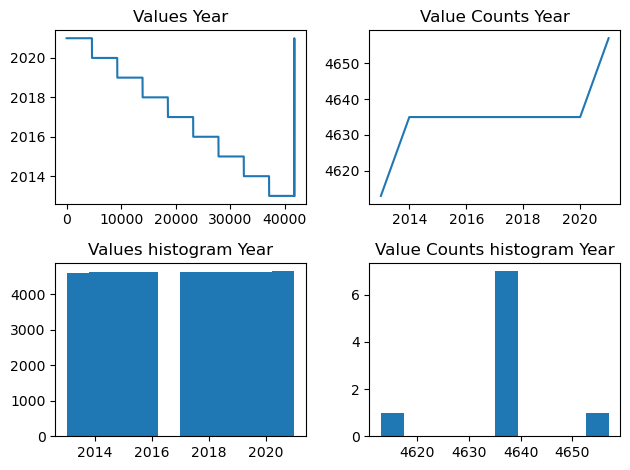

In [6]:
data.data_summary(data)

In [ ]:
data.data_summary(data) # this is a numerical column

In [ ]:
data.data_summary(data) # not numerical data

In [75]:
#this is for creating a random empty value in the table
data.data["Empty"] = np.random.randint(0,2,len(data.data))
data.data["Empty"] = np.where(data.data["Empty"] == 0,None,1)

In [76]:
data.data["Empty"].value_counts()

Empty
1    20679
Name: count, dtype: int64

In [77]:
#Here's I succeeded to fill the none places with 1
data.clear_missing(data.data)

First The Empty Rows is 



Do you wanna delete or fill the empty cells (D/F):  D


,Year,Industry_aggregation_NZSIOC,Industry_code_NZSIOC,Industry_name_NZSIOC,Units,Variable_code,Variable_name,Variable_category,Value,Industry_code_ANZSIC06,Empty
0,2021,Level 1,99999,All industries,Dollars (millions),H01,Total income,Financial performance,"757,504",ANZSIC06 divisions A-S (excluding classes K633...,1
2,2021,Level 1,99999,All industries,Dollars (millions),H05,"Interest, dividends and donations",Financial performance,"49,593",ANZSIC06 divisions A-S (excluding classes K633...,1
6,2021,Level 1,99999,All industries,Dollars (millions),H10,Indirect taxes,Financial performance,"6,991",ANZSIC06 divisions A-S (excluding classes K633...,1
8,2021,Level 1,99999,All industries,Dollars (millions),H12,Salaries and wages paid,Financial performance,"123,620",ANZSIC06 divisions A-S (excluding classes K633...,1
12,2021,Level 1,99999,All industries,Dollars (millions),H20,Non-operating expenses,Financial performance,"14,806",ANZSIC06 divisions A-S (excluding classes K633...,1
...,...,...,...,...,...,...,...,...,...,...,...
41702,2021,Level 3,ZZ11,Food product manufacturing,Dollars (millions),H29,Other assets,Financial position,"5,434","ANZSIC06 groups C111, C112, C113, C114, C115, ...",1
41708,2021,Level 3,ZZ11,Food product manufacturing,Dollars,H35,Surplus per employee count,Financial ratios,"17,700","ANZSIC06 groups C111, C112, C113, C114, C115, ...",1
41709,2021,Level 3,ZZ11,Food product manufacturing,Percentage,H36,Current ratio,Financial ratios,91,"ANZSIC06 groups C111, C112, C113, C114, C115, ...",1
41710,2021,Level 3,ZZ11,Food product manufacturing,Percentage,H37,Quick ratio,Financial ratios,52,"ANZSIC06 groups C111, C112, C113, C114, C115, ...",1


In [78]:
#Here Succeeded to delete all the empty rows
data.clear_missing(data.data)

First The Empty Rows is 



Do you wanna delete or fill the empty cells (D/F):  F
you wanna fill it with :  I'm fill


,Year,Industry_aggregation_NZSIOC,Industry_code_NZSIOC,Industry_name_NZSIOC,Units,Variable_code,Variable_name,Variable_category,Value,Industry_code_ANZSIC06,Empty
0,2021,Level 1,99999,All industries,Dollars (millions),H01,Total income,Financial performance,"757,504",ANZSIC06 divisions A-S (excluding classes K633...,1
1,2021,Level 1,99999,All industries,Dollars (millions),H04,"Sales, government funding, grants and subsidies",Financial performance,"674,890",ANZSIC06 divisions A-S (excluding classes K633...,I'm fill
2,2021,Level 1,99999,All industries,Dollars (millions),H05,"Interest, dividends and donations",Financial performance,"49,593",ANZSIC06 divisions A-S (excluding classes K633...,1
3,2021,Level 1,99999,All industries,Dollars (millions),H07,Non-operating income,Financial performance,"33,020",ANZSIC06 divisions A-S (excluding classes K633...,I'm fill
4,2021,Level 1,99999,All industries,Dollars (millions),H08,Total expenditure,Financial performance,"654,404",ANZSIC06 divisions A-S (excluding classes K633...,I'm fill
...,...,...,...,...,...,...,...,...,...,...,...
41710,2021,Level 3,ZZ11,Food product manufacturing,Percentage,H37,Quick ratio,Financial ratios,52,"ANZSIC06 groups C111, C112, C113, C114, C115, ...",1
41711,2021,Level 3,ZZ11,Food product manufacturing,Percentage,H38,Margin on sales of goods for resale,Financial ratios,40,"ANZSIC06 groups C111, C112, C113, C114, C115, ...",I'm fill
41712,2021,Level 3,ZZ11,Food product manufacturing,Percentage,H39,Return on equity,Financial ratios,12,"ANZSIC06 groups C111, C112, C113, C114, C115, ...",I'm fill
41713,2013,Level 3,ZZ11,Food product manufacturing,Percentage,H40,Return on total assets,Financial ratios,5,"ANZSIC06 groups C111, C112, C113, C114, C115, ...",1


In [76]:
#finally the encoding
data.encode_categorical_data(data.data)

,Year,Industry_aggregation_NZSIOC_Level 1,Industry_aggregation_NZSIOC_Level 3,Industry_aggregation_NZSIOC_Level 4,Industry_code_NZSIOC_99999,Industry_code_NZSIOC_AA,Industry_code_NZSIOC_AA11,Industry_code_NZSIOC_AA111,Industry_code_NZSIOC_AA12,Industry_code_NZSIOC_AA121,...,Industry_code_ANZSIC06_ANZSIC06 groups N731 and N732,Industry_code_ANZSIC06_ANZSIC06 groups O771 and O772 (excluding class O7711),Industry_code_ANZSIC06_ANZSIC06 groups P821 and P822,"Industry_code_ANZSIC06_ANZSIC06 groups Q851, Q852, Q853, and Q859","Industry_code_ANZSIC06_ANZSIC06 groups Q860, Q871, and Q879","Industry_code_ANZSIC06_ANZSIC06 groups R891, R892, and R900","Industry_code_ANZSIC06_ANZSIC06 groups R911, R912, and R913","Industry_code_ANZSIC06_ANZSIC06 groups S941, S942, and S949","Industry_code_ANZSIC06_ANZSIC06 groups S951, S952, and S953",Empty_1
0,2021,True,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
1,2021,True,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
2,2021,True,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
3,2021,True,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
4,2021,True,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41710,2013,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
41711,2013,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
41712,2013,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
41713,2013,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True


In [10]:
encoded_column = pd.get_dummies(data.data['Year'])

In [36]:
data.encode_column(data.data,"Year").head(10)

,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,False,False,False,False,False,False,False,False,True
1,False,False,False,False,False,False,False,False,True
2,False,False,False,False,False,False,False,False,True
3,False,False,False,False,False,False,False,False,True
4,False,False,False,False,False,False,False,False,True
5,False,False,False,False,False,False,False,False,True
6,False,False,False,False,False,False,False,False,True
7,False,False,False,False,False,False,False,False,True
8,False,False,False,False,False,False,False,False,True
9,False,False,False,False,False,False,False,False,True
